In [72]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/romain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
# Sentiment analysis:

def get_sentiment_textblob(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity  # Range: [-1, 1]
    return ((score + 1) * 2 )+ 1  # Maps to 1-5 scale

In [74]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    return ((sia.polarity_scores(text)['compound'] + 1) * 2 )+ 1

In [75]:
DATA_PATH = 'data/Dataset/BeerAdvocate/ratings.csv'

ratings_df = pd.read_csv(DATA_PATH)

rating_per_beer = ratings_df.groupby('beer_id').agg(BeerName=('beer_name', 'min'), Count=('review', 'size'), Mean=('rating', 'mean')).sort_values(by='Mean')

In [76]:
ratings_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True
8393030,Nut Brown Ale,19140,Summit Station Restaurant & Brewery,885,English Brown Ale,5.3,1341741600,Redsox1539,redsox1539.683632,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False


In [77]:
rating_per_beer

,BeerName,Count,Mean
beer_id,,,
141122,Hobb Knobb Blonde,1,1.0
32505,Wasabi Dry,1,1.0
10556,Elysium,1,1.0
271190,Watermelon Wheat,1,1.0
103421,Trendy Cream Ale,1,1.0
...,...,...,...
101220,What's Kraken,1,5.0
181754,Summer Shandy,1,5.0
126526,Blood Saison,1,5.0


In [78]:
merge_df = ratings_df.merge(rating_per_beer, how='inner', right_index=True, left_on='beer_id')
merge_df.drop('BeerName', axis=1, inplace=True)
merge_df = merge_df.dropna()
merge_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,Count,Mean
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,1,2.880000
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,4,3.845000
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,4,3.845000
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,4,3.845000
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,4,3.845000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393026,Irvington Pale Ale,19141,Summit Station Restaurant & Brewery,885,American Pale Ale (APA),6.8,1100516400,ecoboy,ecoboy.1641,3.50,3.00,3.50,3.00,3.5,3.18,"It may say APA on this site, but talking to th...",True,3,3.596667
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True,3,2.713333
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True,3,2.713333
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True,3,2.713333


In [79]:
merge_df_sentiment = merge_df.sample(100).copy()
merge_df_sentiment['sentiment_textblob'] = merge_df_sentiment['text']

merge_df_sentiment['sentiment_textblob']  = merge_df_sentiment['sentiment_textblob'].apply(get_sentiment_textblob)

merge_df_sentiment['sentiment_vader'] = merge_df_sentiment['text']

merge_df_sentiment['sentiment_vader']  = merge_df_sentiment['sentiment_vader'].apply(get_sentiment_vader)


#for index, row in merge_df_sentiment.iterrows():
#    sentiment_score = get_sentiment_textblob(row['text'])
#    merge_df_sentiment.loc[index, 'sentiment_rating'] = sentiment_score

merge_df_sentiment

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,palate,taste,overall,rating,text,review,Count,Mean,sentiment_textblob,sentiment_vader
2028347,Our Special Ale 2004 (Anchor Christmas Ale),20599,Anchor Brewing Company,28,Winter Warmer,5.25,1103194800,FormatKid,formatkid.4506,4.0,...,5.0,4.5,4.5,4.40,A much anticipated Seasonal from Anchor. Poure...,True,214,4.024953,3.656349,4.9364
3186245,Harpoon Celtic Ale,47298,Harpoon Brewery & Beer Hall,98,Irish Red Ale,5.40,1140346800,MurphyMacManus,murphymacmanus.17455,4.5,...,3.0,4.0,5.0,4.01,12-ounce brown glass longneck into Imperial pi...,True,769,3.513316,3.606500,4.8568
7070558,Dead Guy Ale,355,Rogue Ales,132,Maibock / Helles Bock,6.80,1226919600,riored4v,riored4v.147275,4.0,...,4.0,4.0,4.5,3.98,Reviewed on 11/9/08Poured into a pint glass. O...,True,7497,3.944343,4.226667,4.9638
8112174,Limburgse Witte,7807,Brouwerij Cornelissen,3456,Witbier,5.00,1047985200,fattyre,fattyre.538,3.5,...,4.0,4.0,4.5,4.07,Not generally my favorite style but I do reall...,True,35,3.799714,3.304444,4.9114
604472,Aecht Schlenkerla Rauchbier Weizen,1018,Brauerei Heller-Trum / Schlenkerla,263,Rauchbier,5.20,1085392800,Eyedrinkale,eyedrinkale.1741,2.5,...,4.0,4.5,4.5,4.33,What a find and Im so excited to try this. Da...,True,778,3.914434,3.257407,4.9276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376336,Double Bastard Ale,1056,Arrogant Brewing,43153,American Strong Ale,11.00,1095069600,BrewMaster,brewmaster.7302,4.5,...,4.5,5.0,5.0,4.80,This bottle was a 22 oz bomber from 2000. It w...,True,6701,4.257614,3.575758,4.9586
3473309,Octoberfest Lager,20576,Southampton Publick House,1628,Märzen / Oktoberfest,5.50,1293706800,washburnkid,washburnkid.275931,3.5,...,4.0,4.0,4.0,3.97,Enjoyed at the brewery. Reviewed from notes.A ...,True,9,4.021111,3.335714,4.5086
7754641,Munich Light,26107,Emmett's Brewing Company,9704,Munich Helles Lager,4.00,1268910000,greenmiller,greenmiller.336515,4.0,...,4.0,4.0,4.0,3.76,On tap at Emmett's Downers GroveA: Dark golden...,True,14,3.515714,3.215185,3.7674
2516727,Stone Old Guardian Barley Wine Style Ale 2005,21700,Stone Brewing,147,American Barleywine,11.26,1115460000,Troyone,troyone.4118,4.0,...,4.5,4.0,4.0,4.17,Pours a root beer color with a copper hue. No ...,True,124,4.242419,3.421429,3.4526


In [80]:
#merge_df_sentiment.to_csv('sentiment_rating_and_count.csv')

In [81]:
corr = merge_df_sentiment['sentiment_vader'].corr(merge_df_sentiment['sentiment_textblob'])
print("Correlation:", corr)

corr = merge_df_sentiment['sentiment_vader'].corr(merge_df_sentiment['overall'])
print("Correlation:", corr)

corr = merge_df_sentiment['overall'].corr(merge_df_sentiment['sentiment_textblob'])
print("Correlation:", corr)

Correlation: 0.44407009245022144
Correlation: 0.24233568465461985
Correlation: 0.407547681520163


In [82]:
merge_df_sentiment = merge_df_sentiment.sort_values(by='overall', ascending=True)

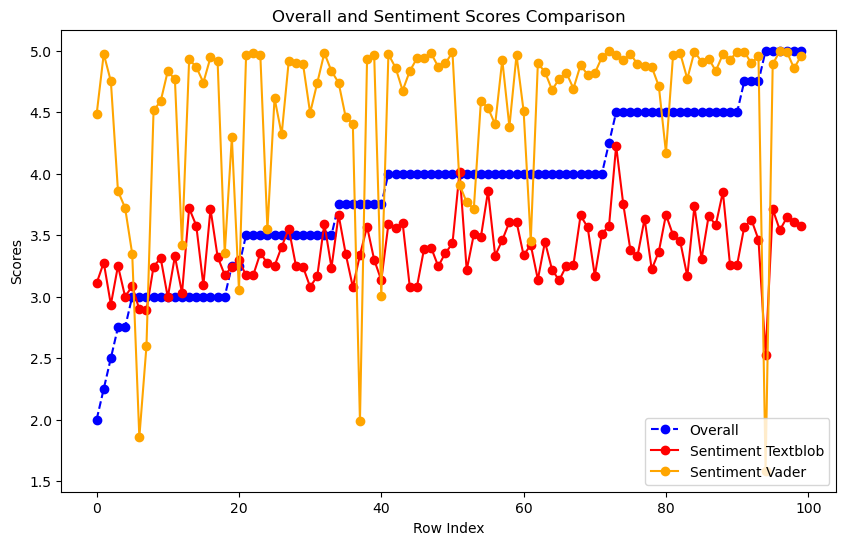

In [83]:
plt.figure(figsize=(10, 6))

x = np.arange(len(merge_df_sentiment.index))
plt.plot(x, merge_df_sentiment['overall'], label='Overall', marker='o', color='b', linestyle='--')

plt.plot(x, merge_df_sentiment['sentiment_textblob'], label='Sentiment Textblob', marker='o', color='r', linestyle='-')

plt.plot(x, merge_df_sentiment['sentiment_vader'], label='Sentiment Vader', marker='o', color='orange', linestyle='-')

# Ajouter des labels et un titre
plt.xlabel('Row Index')
plt.ylabel('Scores')
plt.title('Overall and Sentiment Scores Comparison')

# Légende
plt.legend()

# Afficher le graphique
plt.show()